# PISA Data 2012
## by Miguel Orellana

## Investigation Overview

This presentation first shows the correlation between the scores obtained by students in each of the 3 disciplines. We see this through a series of 3 scatterplots comparing disciplines two by two.

Afterwards, we can see the relationship between each of the 4 background independent variables and the scores, using the violin and box plots obtained in the exploratory visualization.


## Dataset Overview

PISA is a survey that examines students from compulsory education on how well prepared they are for life after school. This investigation focuses on a selection of variables from the PISA Survey 2012, with data belonging to around 500K students from 65 different countries.

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# set color for all plots
base_color = sb.color_palette()[0]

In [2]:
# load in the dataset into a pandas dataframe
df2 = pd.read_csv('pisa2012_clean.csv')

## Correlation between the 3 score variables

The 3 score variables show a linear correlation between each other. This correlation is slightly weaker between math and reading scores, as seen by the more disperse pattern of the scatterplot on the left.

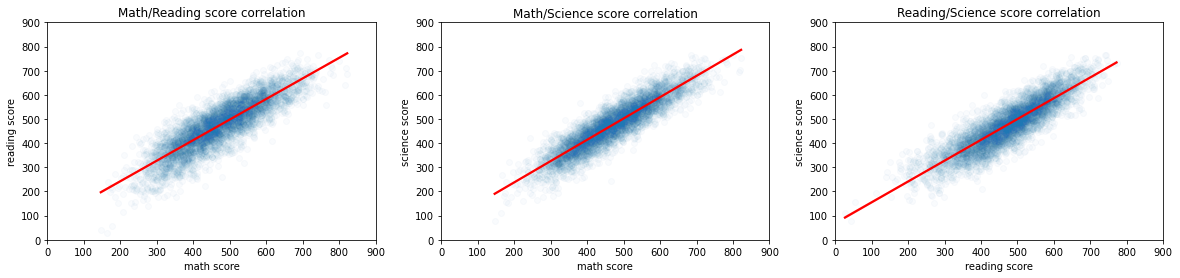

In [3]:
# Create the sample
df_sample = df2.sample(5000)

# Define figure size for subplots
plt.figure(figsize = [20, 4])

# histogram on the left
# 1 row, 3 cols, subplot 1
ax1 = plt.subplot(1, 3, 1) 
sb.regplot(data = df_sample, x = 'score_math', y = 'score_reading', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('math score')
plt.ylabel('reading score')
ax1.set_title("Math/Reading score correlation");

# histogram in the middle
# 1 row, 3 cols, subplot 2
ax2 = plt.subplot(1, 3, 2) 
sb.regplot(data = df_sample, x = 'score_math', y = 'score_science', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('math score')
plt.ylabel('science score')
ax2.set_title("Math/Science score correlation");

# histogram on the right
# 1 row, 3 cols, subplot 3
ax3 = plt.subplot(1, 3, 3) 
sb.regplot(data = df_sample, x = 'score_reading', y = 'score_science', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('reading score')
plt.ylabel('science score')
ax3.set_title("Reading/Science score correlation");


# set the same axis ranges for both charts
plots = [ax1, ax2, ax3]
for ax in plots:
    ax.set_xlim([0, 900])
    ax.set_ylim([0, 900]);

## Score comparison based on student's gender

No clear relationship is appreciated between student's gender and their scores, with the exception of reading, where female students seem to perform better than male students. This can be observed in the upper right box plot of the illustration below.

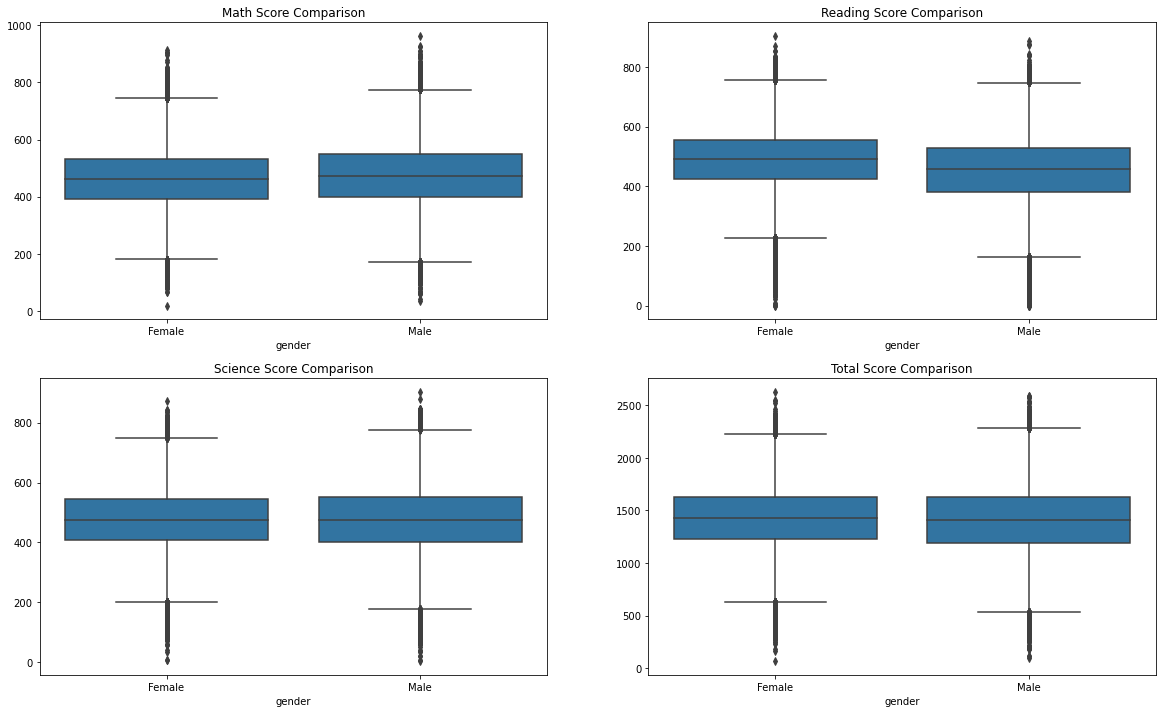

In [4]:
# Set a larger figure size for subplots
plt.figure(figsize = [20, 12])

# 2 row, 2 cols, subplot 1
ax1 = plt.subplot(2, 2, 1) 
sb.boxplot(data=df2, x='gender', y='score_math', color=base_color)
ax1.set_title("Math Score Comparison");

# 2 row, 2 cols, subplot 2
ax2 = plt.subplot(2, 2, 2) 
sb.boxplot(data=df2, x='gender', y='score_reading', color=base_color)
ax2.set_title("Reading Score Comparison");

# 2 row, 2 cols, subplot 3
ax3 = plt.subplot(2, 2, 3) 
sb.boxplot(data=df2, x='gender', y='score_science', color=base_color)
ax3.set_title("Science Score Comparison");

# 2 row, 2 cols, subplot 4
ax4 = plt.subplot(2, 2, 4) 
sb.boxplot(data=df2, x='gender', y='score_total', color=base_color)
ax4.set_title("Total Score Comparison");

# remove y-labels to avoid redundancy
plots = [ax1, ax2, ax3, ax4]
for ax in plots:
    ax.set_ylabel(None);

## Score comparison based on OECD membership

Students from OECD countries present better results in the exams across all 3 disciplines. This could indicate that these countries provide a better background for preparing students for the future. In order to know which factors have a greater impact, the PISA survey could be assessed in more detail. Lots of additional variables are provided in the original dataset.

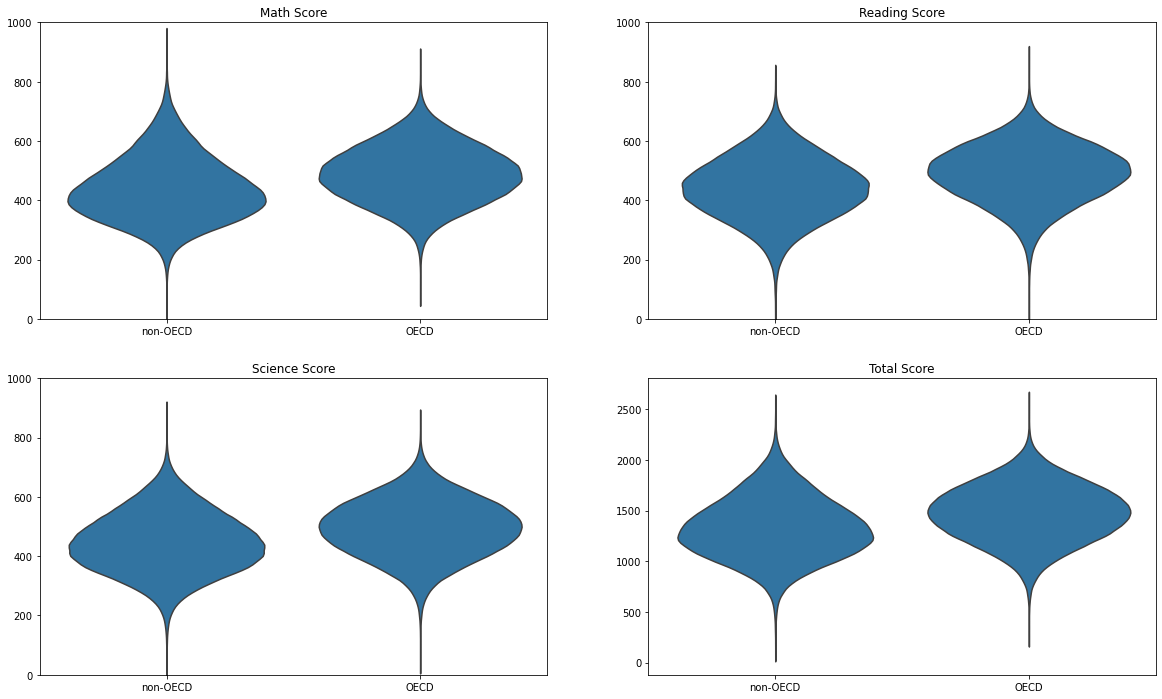

In [5]:
# Set a larger figure size for subplots
plt.figure(figsize = [20, 12])

# 2 row, 2 cols, subplot 1
ax1 = plt.subplot(2, 2, 1) 
sb.violinplot(data=df2, x='oecd', y='score_math', color=base_color, inner=None)
ax1.set_title("Math Score");

# 2 row, 2 cols, subplot 2
ax2 = plt.subplot(2, 2, 2) 
sb.violinplot(data=df2, x='oecd', y='score_reading', color=base_color, inner=None)
ax2.set_title("Reading Score");

# 2 row, 2 cols, subplot 3
ax3 = plt.subplot(2, 2, 3) 
sb.violinplot(data=df2, x='oecd', y='score_science', color=base_color, inner=None)
ax3.set_title("Science Score");

# 2 row, 2 cols, subplot 4
ax4 = plt.subplot(2, 2, 4) 
sb.violinplot(data=df2, x='oecd', y='score_total', color=base_color, inner=None)
ax4.set_title("Total Score")

# remove axis names and rename x-ticklabels
plots = [ax1, ax2, ax3, ax4]
for ax in plots:
    ax.set_xticklabels(('non-OECD', 'OECD'))
    ax.set(xlabel=None, ylabel=None)

plots2 = [ax1, ax2, ax3]
for ax in plots2:
    ax.set_ylim([0, 1000]);

## Score comparison based on parent's education level

Students' whose parents have a higher level of education obtain significantly better scores. The violin plot below shows the score distribution based on the mother's education level. While students whose mother has not completed primary school have a median score of around 1200 points, students whose mother has completed upper secondary school present a median score of around 1500.

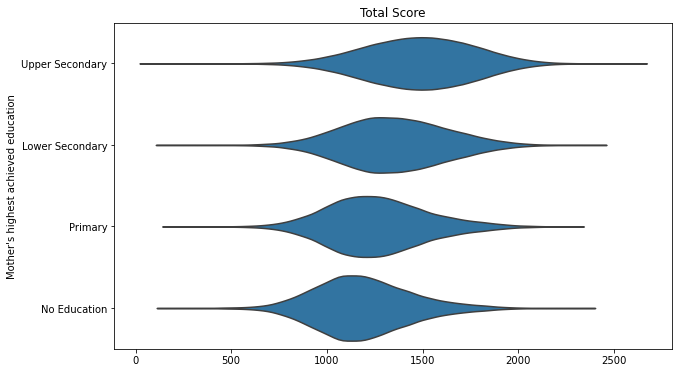

In [6]:
# Types of education
education = ['Upper Secondary', 'Lower Secondary', 'Primary', 'No Education']

# Return the types for education with the categories and orderedness
education_levels = pd.api.types.CategoricalDtype(ordered=True, categories=education)

# Convert the "education" columns into an ordered categorical type 
df2['education_father'] = df2['education_father'].astype(education_levels)
df2['education_mother'] = df2['education_mother'].astype(education_levels)

# figure size
plt.figure(figsize = [10, 6])

# plot
ax = sb.violinplot(data=df2, y='education_mother', x='score_total', color=base_color, inner=None)
ax.set_title("Total Score");
ax.set(ylabel="Mother\'s highest achieved education", xlabel=None);

## Score comparison based on internet use at school

The use of internet at school doesn't seem to provide better test results. On the contrary, in non-OECD countries, students who claim to use internet at school show slightly lower performance in all 3 disciplines.

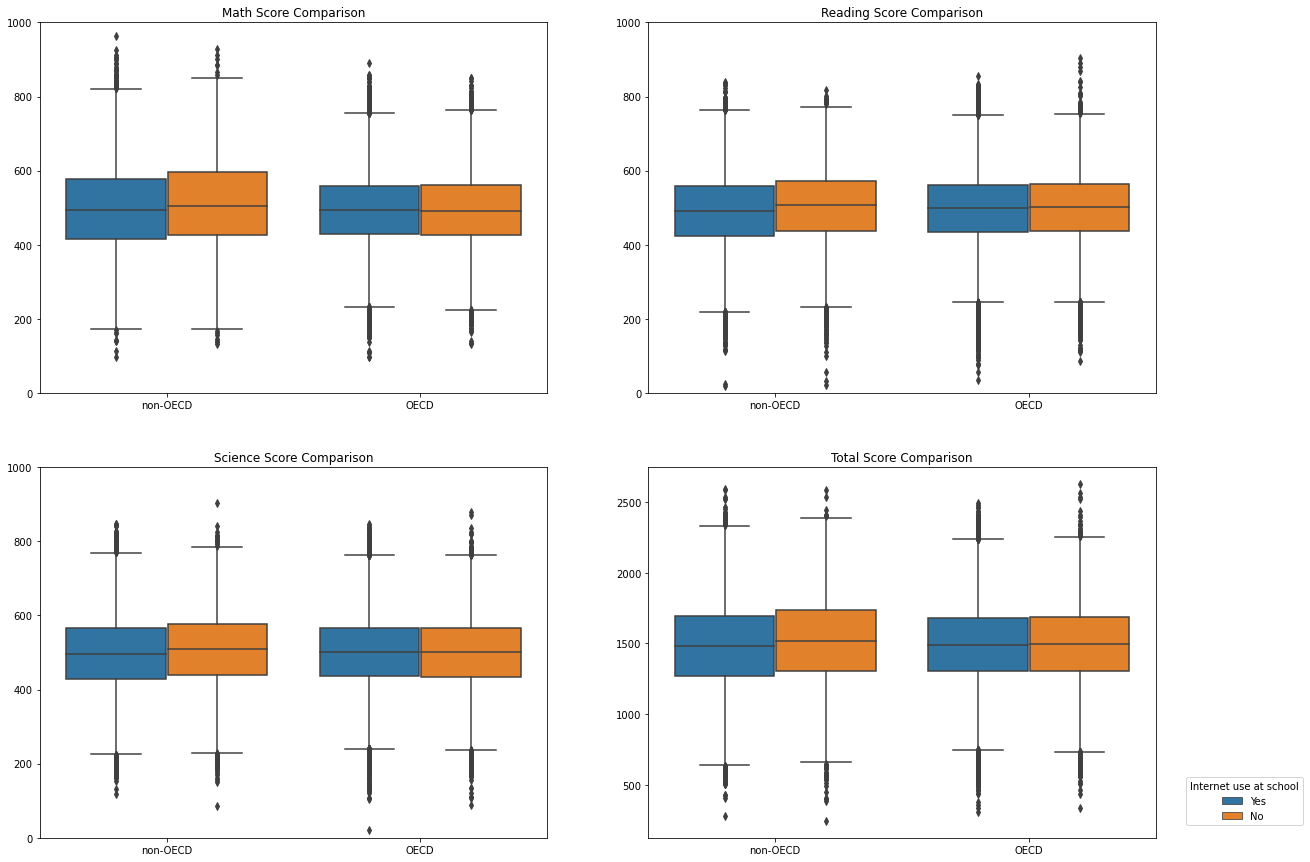

In [7]:
# Set a larger figure size for subplots
plt.figure(figsize = [20, 15])

# 2 row, 2 cols, subplot 1
ax1 = plt.subplot(2, 2, 1) 
sb.boxplot(data=df2, x='oecd', y='score_math', hue='school_internet')
ax1.set_title("Math Score Comparison");

# 2 row, 2 cols, subplot 2
ax2 = plt.subplot(2, 2, 2) 
sb.boxplot(data=df2, x='oecd', y='score_reading', hue='school_internet')
ax2.set_title("Reading Score Comparison");

# 2 row, 2 cols, subplot 3
ax3 = plt.subplot(2, 2, 3) 
sb.boxplot(data=df2, x='oecd', y='score_science', hue='school_internet')
ax3.set_title("Science Score Comparison");

# 2 row, 2 cols, subplot 4
ax4 = plt.subplot(2, 2, 4) 
sb.boxplot(data=df2, x='oecd', y='score_total', hue='school_internet')
ax4.set_title("Total Score Comparison");

# remove axis names and rename x-ticklabels
plots = [ax1, ax2, ax3, ax4]
for ax in plots:
    ax.set_xticklabels(('non-OECD', 'OECD'))
    ax.set(xlabel=None, ylabel=None)
    
# clean and position the legend
box = ax4.get_position()
ax4.set_position([box.x0, box.y0, box.width, box.height])
ax4.legend(title="Internet use at school", loc='center left', bbox_to_anchor=(1.05, 0.1))

plots2 = [ax1, ax2, ax3]
for ax in plots2:
    ax.set_ylim([0, 1000]);
    ax.get_legend().remove()
plt.show();

In [ ]:
!jupyter nbconvert "Part_II_slide_deck.ipynb" --to slides --post serve --no-input --no-prompt